<a href="https://colab.research.google.com/github/ANGEL05122002/Modelos-y-Simulacion/blob/main/TP1/%20Proyecto_de_Modelos_y_Simulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo 1: Simulación Monte Carlo — Precio de un Activo Financiero

Valor estimado de la opción call: 6.0603


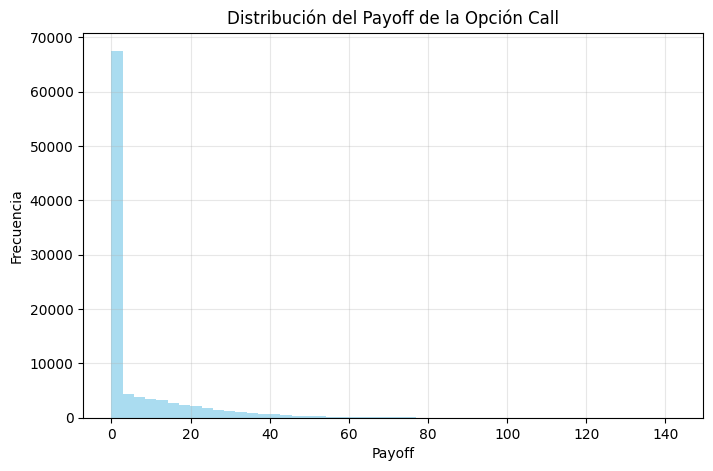

In [5]:
# MODELO 1: MONTE CARLO - OPCIÓN CALL EUROPEA
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
S0 = 100      # Precio inicial
K = 110       # Strike
r = 0.05      # Tasa libre de riesgo
sigma = 0.2   # Volatilidad
T = 1.0       # Tiempo a vencimiento (años)
N = 100000    # Simulaciones

# Simulación de precios al vencimiento
np.random.seed(42)
Z = np.random.randn(N)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

# Payoff de la opción
payoff = np.maximum(ST - K, 0)

# Valor justo descontado
precio_call = np.exp(-r * T) * np.mean(payoff)

print(f"Valor estimado de la opción call: {precio_call:.4f}")

# Visualización
plt.figure(figsize=(8,5))
plt.hist(payoff, bins=50, color='skyblue', alpha=0.7)
plt.title('Distribución del Payoff de la Opción Call')
plt.xlabel('Payoff')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.savefig('fig_montecarlo_call.png', dpi=300)
plt.show()


# MODELO 2 — Bootstrapping: Intervalo de confianza no paramétrico para la media de rendimientos

Media muestral: 0.00023
IC Bootstrap (95%): (-0.00160, 0.00193)


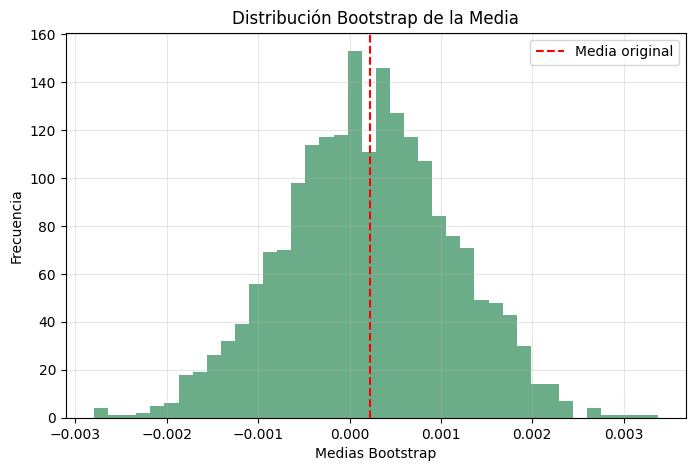

In [6]:
# MODELO 2: BOOTSTRAPPING - INTERVALO DE LA MEDIA

import numpy as np
import matplotlib.pyplot as plt

# Datos simulados: rendimientos diarios
np.random.seed(123)
rendimientos = np.random.normal(0.001, 0.02, 500)  # 500 días

# Bootstrap
B = 2000
medias_boot = np.zeros(B)

for b in range(B):
    muestra = np.random.choice(rendimientos, size=len(rendimientos), replace=True)
    medias_boot[b] = np.mean(muestra)

# Intervalo de confianza al 95%
ic_low, ic_high = np.percentile(medias_boot, [2.5, 97.5])

print(f"Media muestral: {np.mean(rendimientos):.5f}")
print(f"IC Bootstrap (95%): ({ic_low:.5f}, {ic_high:.5f})")

# Figura
plt.figure(figsize=(8,5))
plt.hist(medias_boot, bins=40, color='seagreen', alpha=0.7)
plt.axvline(np.mean(rendimientos), color='red', linestyle='--', label='Media original')
plt.title('Distribución Bootstrap de la Media')
plt.xlabel('Medias Bootstrap')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('fig_bootstrap_conf.png', dpi=300)
plt.show()


# MODELO 3 — Inversión bajo incertidumbre: Valor Presente Neto (VPN)

Media del VPN: 9,370.09
Probabilidad(VPN > 0): 0.717


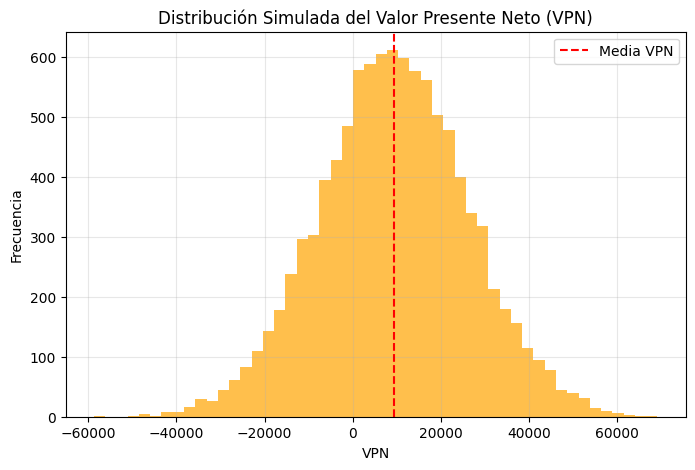

In [7]:
# MODELO 3: INVERSIÓN BAJO INCERTIDUMBRE - VPN

import numpy as np
import matplotlib.pyplot as plt

# Parámetros
np.random.seed(7)
T = 5              # años
r = 0.10           # tasa de descuento
CF_mean = 50000
CF_std = 10000
N = 10000          # simulaciones
costo_inicial = 180000

# Simulación de flujos
CF_sim = np.random.normal(CF_mean, CF_std, (N, T))
VPN = np.sum(CF_sim / (1 + r) ** np.arange(1, T + 1), axis=1) - costo_inicial

# Resultados
print(f"Media del VPN: {np.mean(VPN):,.2f}")
print(f"Probabilidad(VPN > 0): {np.mean(VPN > 0):.3f}")

# Figura
plt.figure(figsize=(8,5))
plt.hist(VPN, bins=50, color='orange', alpha=0.7)
plt.axvline(np.mean(VPN), color='red', linestyle='--', label='Media VPN')
plt.title('Distribución Simulada del Valor Presente Neto (VPN)')
plt.xlabel('VPN')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('fig_vpn_simulado.png', dpi=300)
plt.show()
